In [78]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# 함수의 계수를 랜덤으로 추출
def random_func(var_num, var_range):
    var_picked = np.random.randint(1, var_range+1, size=var_num)
    print(var_picked)
    return var_picked

# 함숫값 계산
def cal_func(var_list, x_index):
    x_list = np.array([x_index**i for i in range(len(var_list))])
    return sum(var_list*x_list)

# 미분
def grad_func(var_list, x_index):
    lambda_x = 1e-6
    func_val = cal_func(var_list, x_index)
    func_val_lambda = cal_func(var_list, x_index+lambda_x)
    return (func_val_lambda - func_val) / lambda_x

# 경사하강법
def gradient_descent(var_num, var_range, picked_var):
    return_x_list = []
    return_grad_list = []
    
    x_index = 0
    min_grad = np.inf
    alpha = 1e-3
    cnt = 0
    while True:
        if cnt > 200:
            break
            
        grad_at_point = grad_func(picked_var, x_index)
        
        if abs(grad_at_point) < 0.01:
            min_grad = grad_at_point
            print('-----------')
            print(f'x_index : {x_index}')
            print(f'grad_at_point : {grad_at_point}')
            break
            
        if min_grad > abs(grad_at_point):
            print('\n----------- min_grad updated')
            print(f'min_grad : {grad_at_point}')
            print(f'x_index : {x_index}')
            
            return_x_list.append(x_index)
            return_grad_list.append(grad_at_point)
            
            min_grad = abs(grad_at_point)
            x_index -= alpha*grad_at_point
            alpha = 0.2
            
        else:
            print('\n-----------')
            print(f'min_grad : {grad_at_point}')
            print(f'x_index : {x_index}')
            
            return_x_list.append(x_index)
            return_grad_list.append(grad_at_point)
            
            x_index -= alpha*grad_at_point
            
        cnt += 1
        
        
    return round(min_grad, 6), return_x_list, return_grad_list

In [114]:
var_num = 3
var_range = 5
picked_var = random_func(var_num, var_range)

min_grad, returned_x, returned_grad = gradient_descent(var_num, var_range, picked_var)

[1 2 4]

----------- min_grad updated
min_grad : 2.0000039999690244
x_index : 0

----------- min_grad updated
min_grad : 1.9840039678920007
x_index : -0.0020000039999690244

----------- min_grad updated
min_grad : -1.1904023805575648
x_index : -0.39880079757836917

----------- min_grad updated
min_grad : 0.7142414283345389
x_index : -0.16072032146685622

----------- min_grad updated
min_grad : -0.42854485704513223
x_index : -0.303568607133764

----------- min_grad updated
min_grad : 0.2571269142048749
x_index : -0.21785963572473754

----------- min_grad updated
min_grad : -0.15427614852292493
x_index : -0.2692850185657125

----------- min_grad updated
min_grad : 0.09256568911375496
x_index : -0.23842978886112753

----------- min_grad updated
min_grad : -0.055539413512661895
x_index : -0.2569429266838785

----------- min_grad updated
min_grad : 0.03332364817421052
x_index : -0.24583504398134615

----------- min_grad updated
min_grad : -0.01999418886011739
x_index : -0.25249977361618825


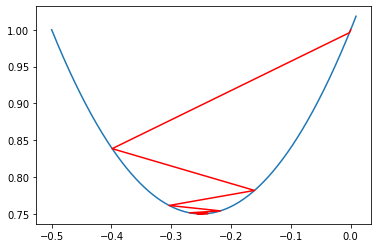

In [116]:
plt_x = np.arange(-0.5, 0.01, 0.001)
plt_y = np.array(list(map(lambda x: cal_func(picked_var, x), plt_x)))

moved_x = returned_x
moved_y = np.array(list(map(lambda x: cal_func(picked_var, x), returned_x)))

plt.plot(plt_x, plt_y)
plt.plot(moved_x, moved_y, c='red')